In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model

from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import accuracy_score

# KNN

In [29]:
df = pd.read_csv("bankloan.csv")
df

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [30]:
df.shape

(700, 9)

In [31]:
df.isna().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [32]:
target = ['default']
feature = ['employ','debtinc','creddebt','othdebt']
x = df[feature]
y = df[target]

In [33]:
x

,employ,debtinc,creddebt,othdebt
0,17,9.3,11.359392,5.008608
1,10,17.3,1.362202,4.000798
2,15,5.5,0.856075,2.168925
3,15,2.9,2.658720,0.821280
4,2,17.3,1.787436,3.056564
...,...,...,...,...
695,6,4.6,0.262062,0.979938
696,6,11.5,0.369495,2.045505
697,15,7.6,0.491264,1.940736
698,19,8.4,2.302608,4.165392


In [34]:
y

,default
0,1
1,0
2,0
3,0
4,1
...,...
695,1
696,0
697,0
698,0


In [35]:
(x_test.shape)

(560, 1)

In [36]:
x_train,x_test,y_train,y_test = train_test_split(
    x,
    y,
     stratify= y,
    test_size=0.2,
    random_state=2020)

In [37]:
scaler = MinMaxScaler()
scaler.fit(x_train)
X_train_scaled = scaler.transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [38]:
x_train_scaler

array([[0.06451613, 0.38141809, 0.19426856, 0.12266837],
       [0.58064516, 0.31784841, 0.21946884, 0.19818871],
       [0.22580645, 0.14669927, 0.0301265 , 0.02710951],
       ...,
       [0.61290323, 0.10513447, 0.01876867, 0.13858118],
       [0.58064516, 0.24694377, 0.04032285, 0.17337699],
       [0.        , 0.80684597, 0.13576391, 0.11726775]])

In [39]:
k = range(1,100,2)
training_accuracy = []
test_accuracy = []
score = 0
for i in k :
    Knn = KNeighborsClassifier(n_neighbors = i)
    Knn.fit(X_train_scaled,y_train)

    y_predict_train = Knn.predict(X_train_scaled)
    training_accuracy.append(accuracy_score(y_train,y_predict_train))

    y_predict_test = Knn.predict(X_test_scaled)
    acc_score = accuracy_score(y_test,y_predict_test)
    test_accuracy.append(acc_score)

    if score < acc_score:
        score = acc_score
        best_k = i
    

F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\C

F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\Conda\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
F:\C

Text(0, 0.5, 'accuracy')

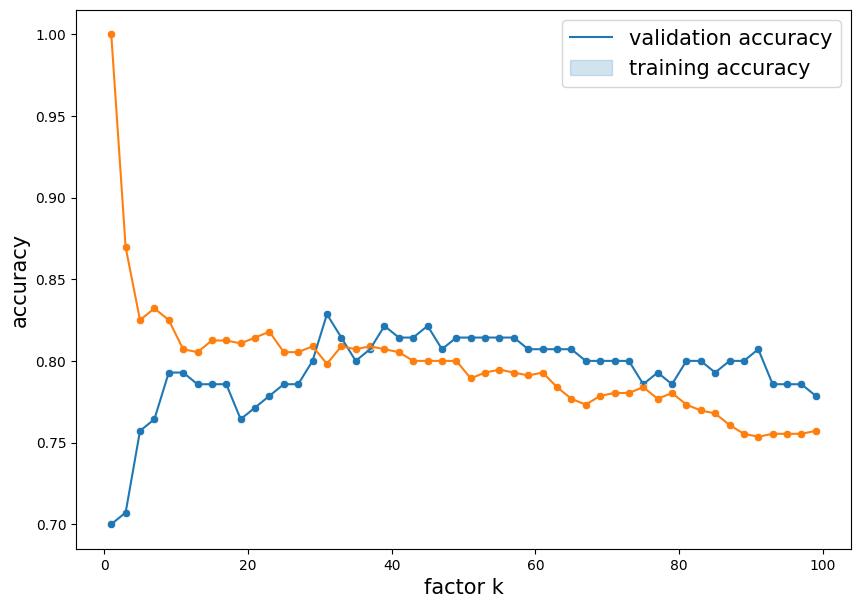

In [40]:
plt.figure(figsize=(10,7))
sns.lineplot(x=k,y=test_accuracy)
sns.scatterplot(x=k,y=test_accuracy)
sns.lineplot(x=k,y=training_accuracy)
sns.scatterplot(x=k,y=training_accuracy)
plt.legend(['validation accuracy','training accuracy'], fontsize = 15)
plt.xlabel('factor k', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

In [41]:
print(f"Best K : {best_k}")
print(f"acuracy : {score}",)

Best K : 31
acuracy : 0.8285714285714286


# DECISION TREE

In [182]:
depth = range(1,25)
training_tree_accuracy = []
test_tree_accuracy = []
score_tree = 0
for i in depth :
    tree = DecisionTreeClassifier(
        criterion = 'entropy',
      max_depth = i)
    tree.fit(x_train,y_train)

    y_predict_train_tree = tree.predict(x_train)
    training_tree_accuracy.append(accuracy_score(y_train,y_predict_train_tree))

    y_predict_test_tree = tree.predict(x_test)
    acc_score_tree = accuracy_score(y_test,y_predict_test_tree)
    test_tree_accuracy.append(acc_score_tree)

    if score_tree < acc_score_tree:
      best_depth = i
      score_tree = acc_score_tree

8
0.6928571428571428


Text(0, 0.5, 'accuracy')

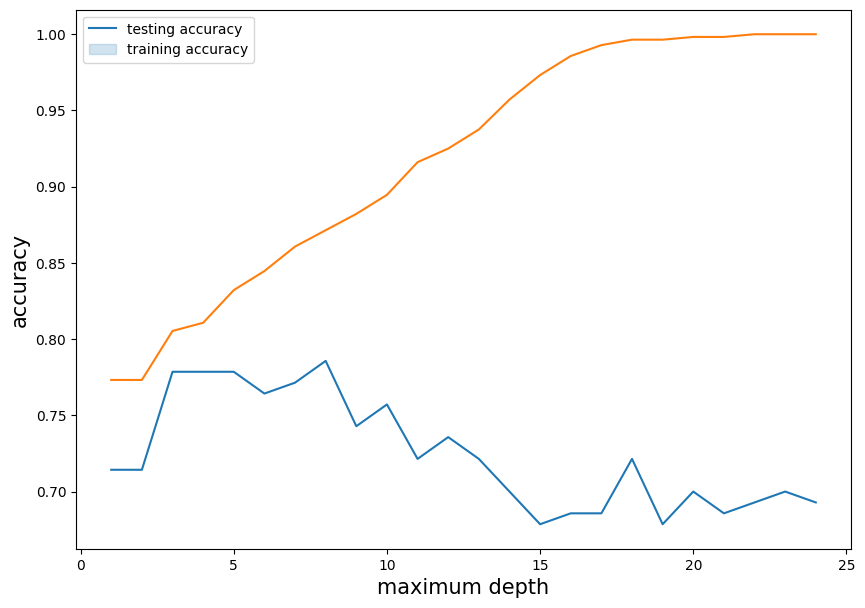

In [183]:
plt.figure(figsize = (10,7))
sns.lineplot(x = depth, y = test_tree_accuracy)
sns.lineplot(x = depth,y = training_tree_accuracy)
plt.legend(['testing accuracy','training accuracy'])
plt.xlabel('maximum depth', fontsize = 15)
plt.ylabel('accuracy', fontsize = 15)

In [185]:
print("Best Depths : ",best_depth)
print("Accuracy_Score :",acc_score_tree)

Best Depths :  8
Accuracy_Score : 0.6928571428571428
